In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数

In [4]:
df = pd.read_csv('measurements.csv',decimal=',')

In [5]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [6]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [8]:
df_cl = df.drop(['specials','refill gas'],axis=1)

In [9]:
df_cl.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN


In [10]:
df_cl = df_cl.fillna(0)
df_cl

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.0
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.0
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.0
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.0


In [11]:
df_clm = pd.get_dummies(df_cl)
df_clm

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,45.0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,0.0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,0.0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0,0.0,0,1
384,16.1,4.3,38,25.0,31,1,0,0,0.0,0,1
385,16.0,3.8,45,25.0,19,0,0,0,0.0,0,1
386,15.4,4.6,42,25.0,31,1,0,0,0.0,0,1


訓練データと学習データに分ける

In [12]:
y = df_clm['consume'].values
X = df_clm.drop(['consume'],axis =1).values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(array([253.,  44.,   5.,   2.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([  1.7 ,  23.14,  44.58,  66.02,  87.46, 108.9 , 130.34, 151.78,
        173.22, 194.66, 216.1 ]),
 <a list of 10 Patch objects>)

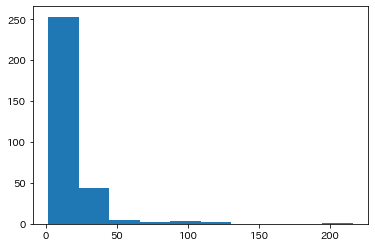

(array([253.,  44.,   5.,   2.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

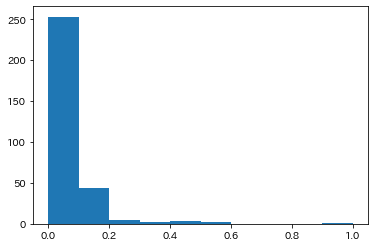

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
normsc = MinMaxScaler()
X_train_norm = normsc.fit_transform(X_train)
plt.hist(X_train_norm[:, 0]) #正規化後の1つ目の特徴に関するヒストグラム（学習用データ）

(array([253.,  44.,   5.,   2.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([-0.89654644,  0.21523337,  1.32701318,  2.438793  ,  3.55057281,
         4.66235262,  5.77413243,  6.88591224,  7.99769205,  9.10947187,
        10.22125168]),
 <a list of 10 Patch objects>)

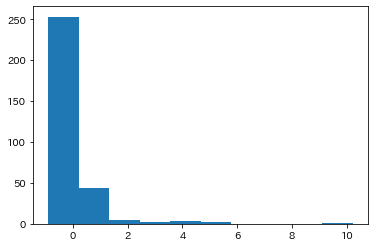

In [15]:
#ワインデータの標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
plt.hist(X_train_stand[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（学習用データ）

(array([62., 11.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-0.9172886 ,  0.17011917,  1.25752695,  2.34493472,  3.43234249,
         4.51975026,  5.60715804,  6.69456581,  7.78197358,  8.86938136,
         9.95678913]),
 <a list of 10 Patch objects>)

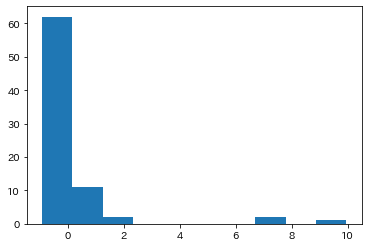

In [16]:
X_test_stand = stdsc.transform(X_test)
plt.hist(X_test_stand[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（テストデータ）

In [17]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_stand,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 値を予測
y_pred =model.predict(X_test_stand)

# MSEを計算
mse = mean_squared_error(y_test, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 1.508
MAE = 0.704
RMSE = 1.228


In [19]:
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.646

Fold 2
MAE = 0.635

Fold 3
MAE = 0.747

Fold 4
MAE = 0.603

Fold 5
MAE = 0.507

Cross Validation MAE = 0.628


In [20]:
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=12345).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.565

Fold 2
MAE = 0.732

Fold 3
MAE = 0.646

Fold 4
MAE = 0.546

Fold 5
MAE = 0.666

Cross Validation MAE = 0.631
